In [348]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset

In [349]:
df = pd.read_csv("water_potability dataset.csv")

Exploratory Data Analysis

In [350]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [351]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [352]:
print("shape:",df.shape)
print("Datatypes:\n",df.dtypes)

shape: (3276, 10)
Datatypes:
 ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [354]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [355]:
df.duplicated().any()

np.False_

In [356]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Handling Missing Values:

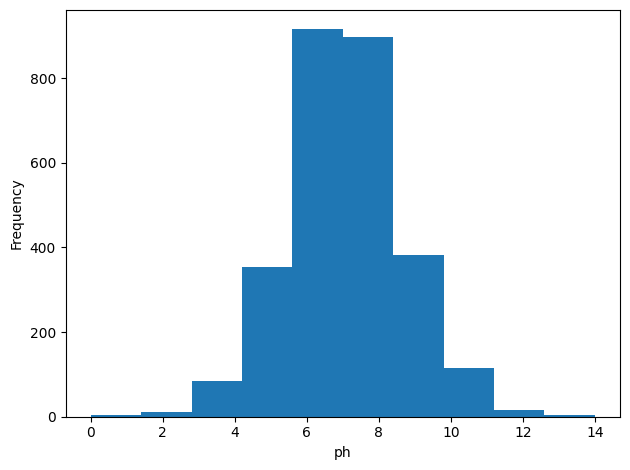

In [357]:
#ph, Sulfate and Trihalomethanes have null values. So, we need to fill these null values

df['ph'].plot(kind ='hist')
plt.xlabel("ph")
plt.tight_layout()
plt.show()

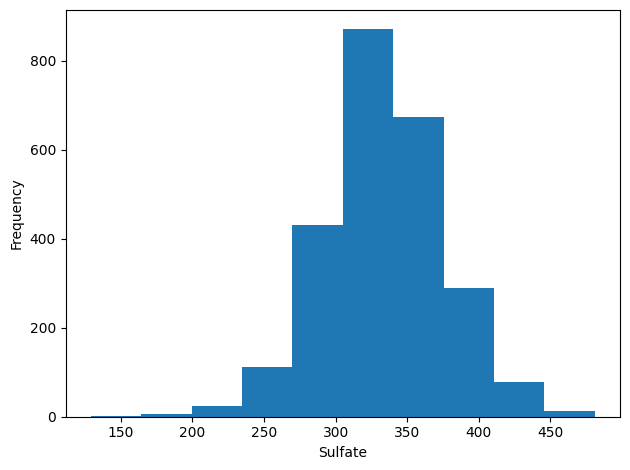

In [358]:
df['Sulfate'].plot(kind="hist")
plt.xlabel("Sulfate")
plt.tight_layout()
plt.show()

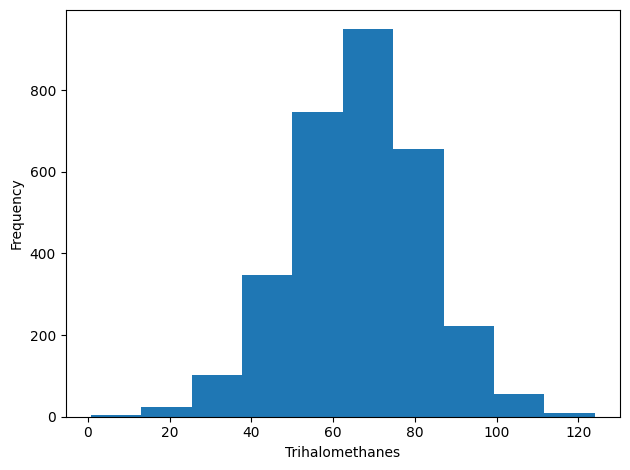

In [359]:
df['Trihalomethanes'].plot(kind="hist")
plt.xlabel("Trihalomethanes")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KDE Plot of Trihalomethanes')

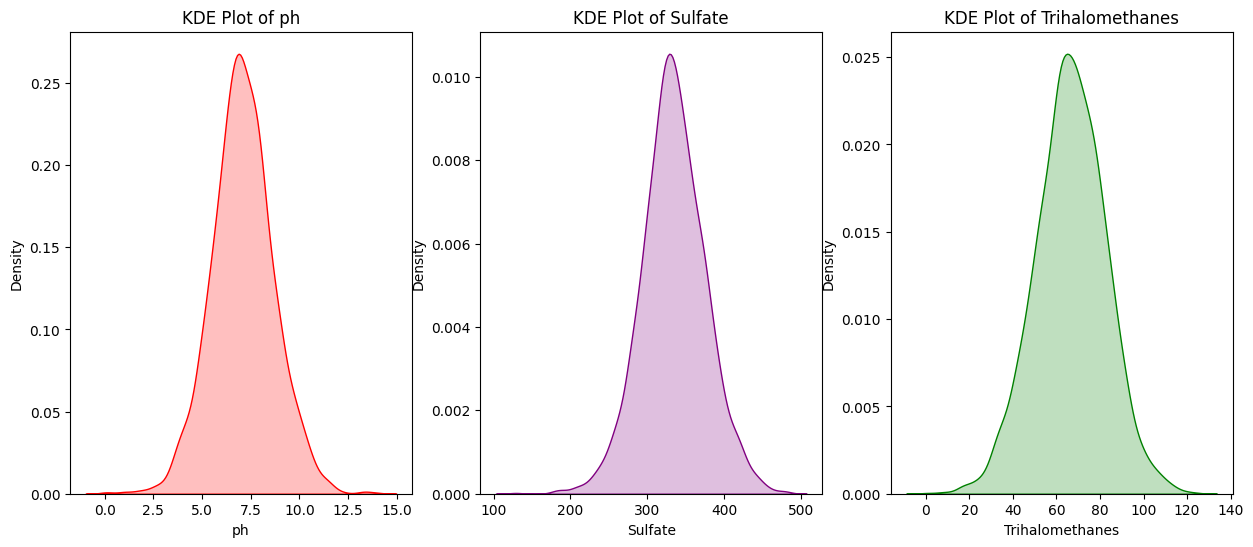

In [360]:
#kde plot
ffig, ax=plt.subplots(1,3, figsize=(15,6))
sns.kdeplot(df.ph,ax=ax[0],color="red",fill=True).set_title("KDE Plot of ph")
sns.kdeplot(df.Sulfate, ax=ax[1], color="purple", fill=True).set_title("KDE Plot of Sulfate")
sns.kdeplot(df.Trihalomethanes,ax=ax[2], color="green",fill=True).set_title("KDE Plot of Trihalomethanes") 

In [361]:
#Filling null values with the mean of that columns
df= df.fillna(df.mean())

In [362]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Checking for Correlation

In [363]:
correlation=df.corr()
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<Axes: >

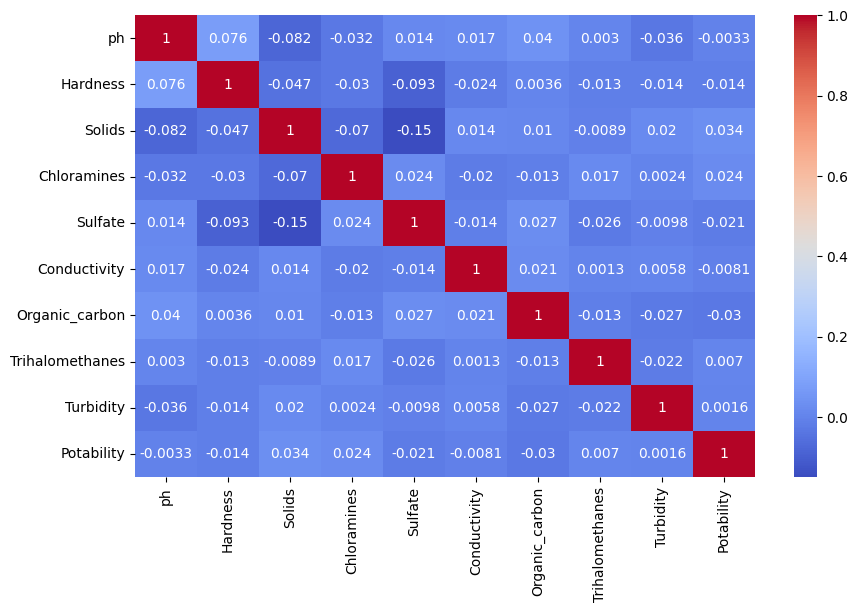

In [364]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap="coolwarm")

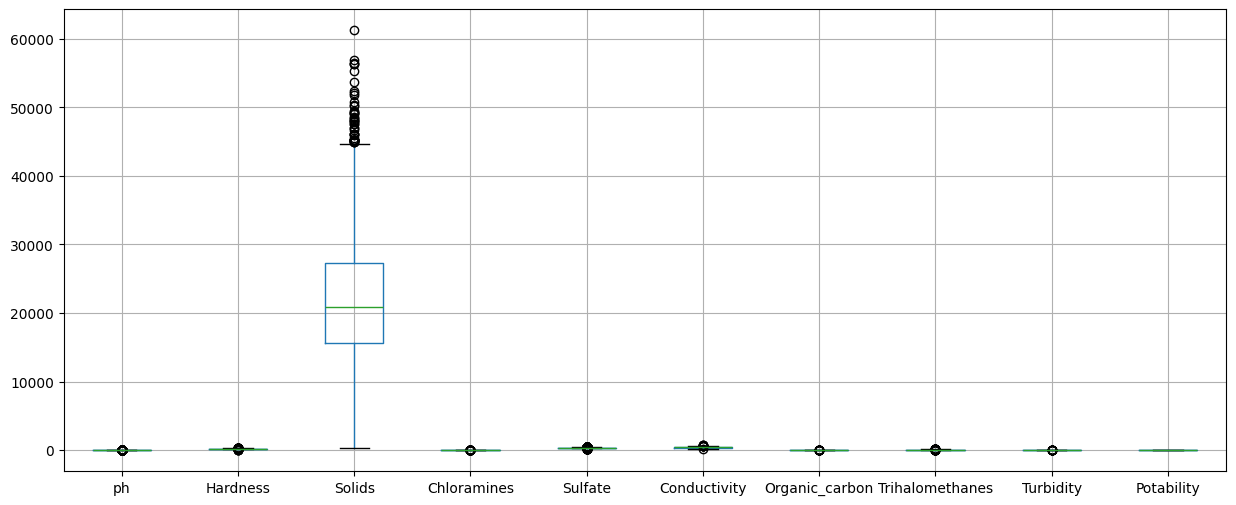

In [365]:
#boxplot
df.boxplot(figsize=(15,6))
plt.show()

In [366]:
df['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

Not removing the elements because it may be important to decide the quality of water 

In [367]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

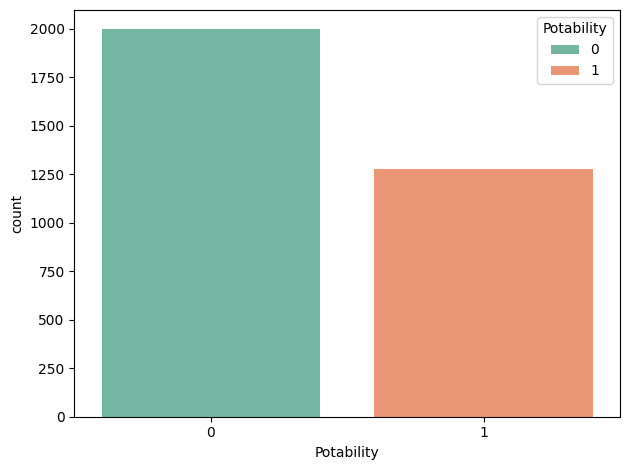

In [368]:
sns.countplot(x="Potability", data=df,hue="Potability", palette="Set2")
plt.tight_layout()
plt.show()

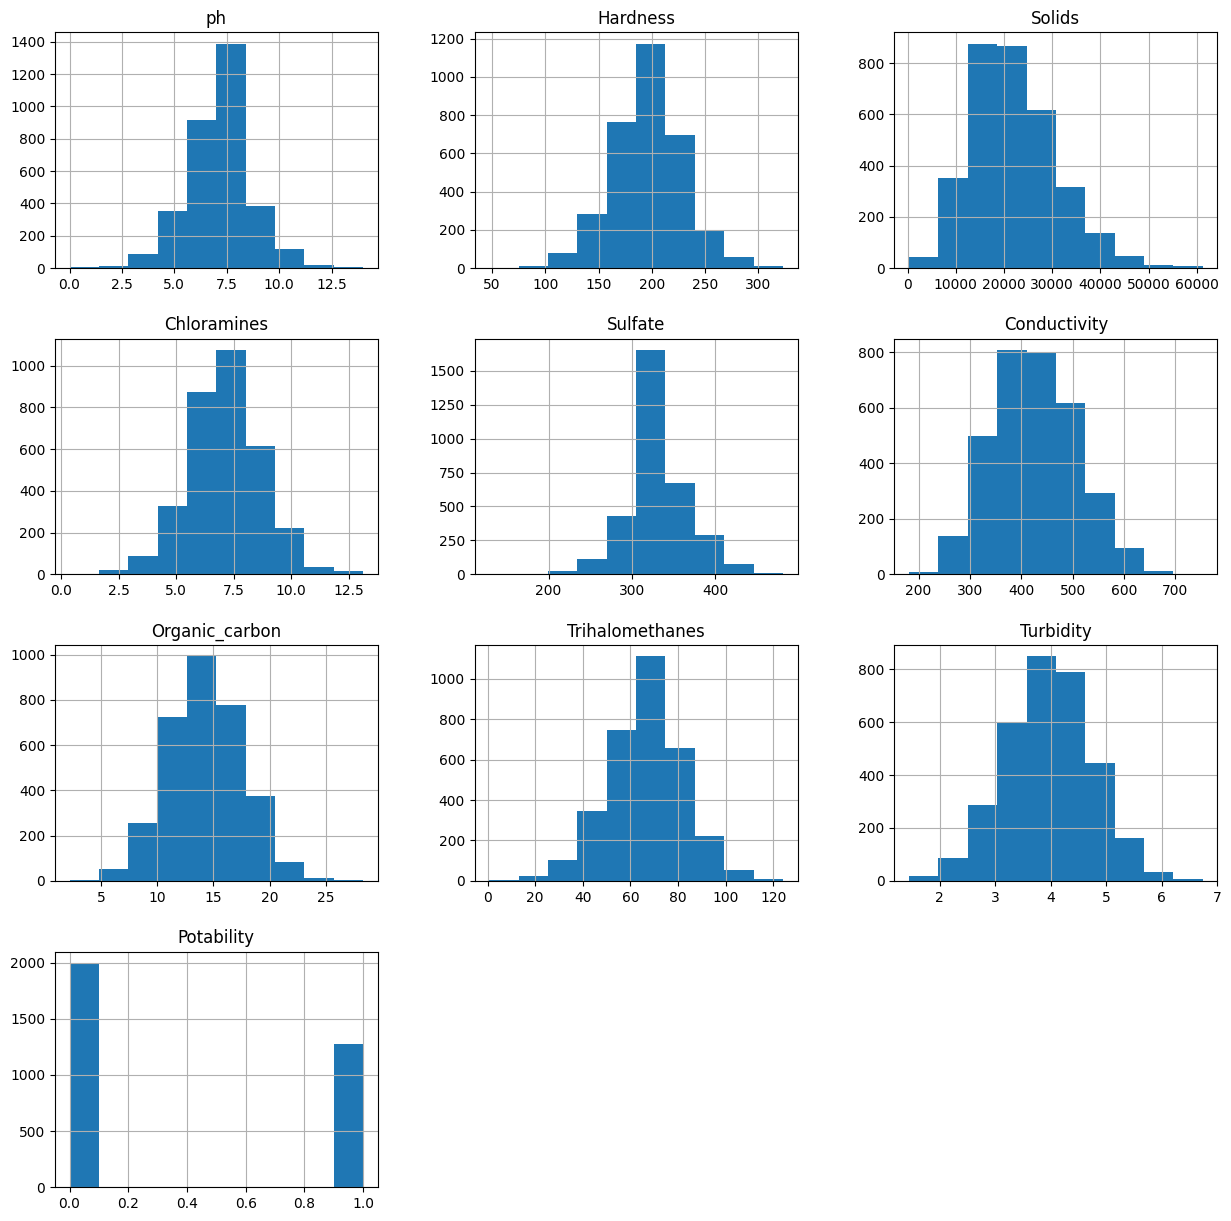

In [369]:
hist_plot=df.hist(figsize=(15,15) )


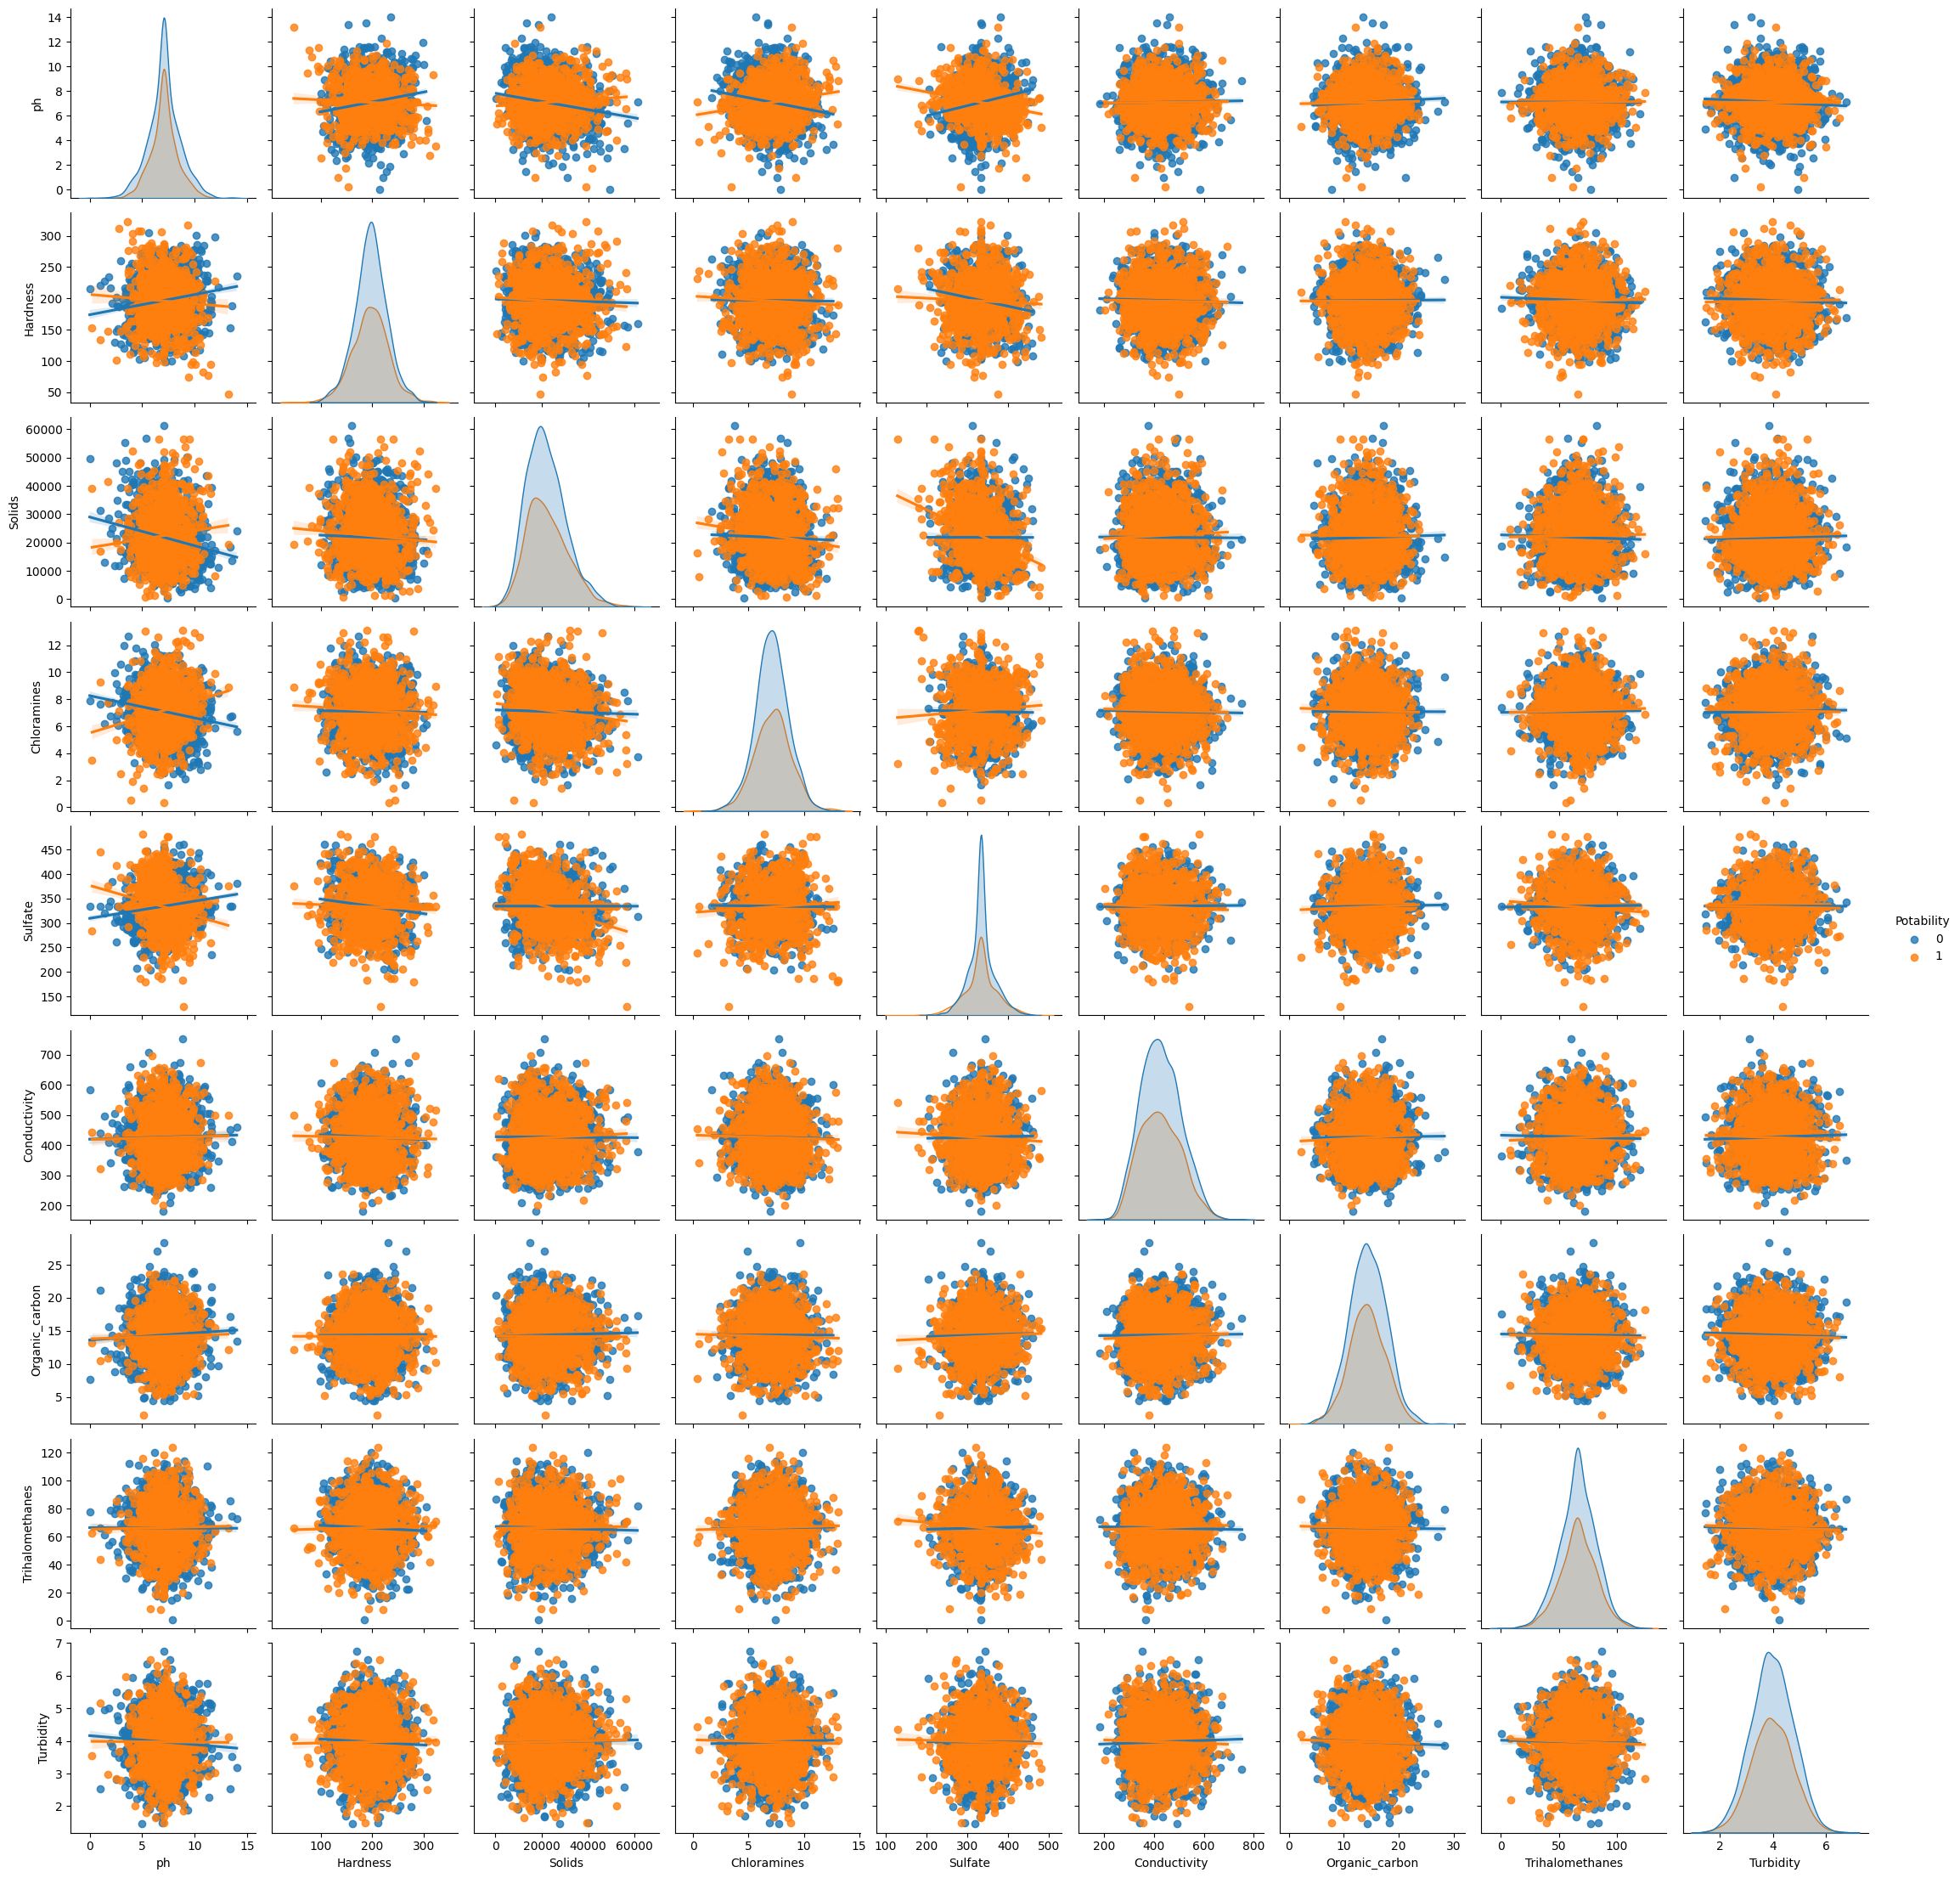

In [370]:
sns.pairplot(df, hue='Potability', kind='reg')

In [371]:
df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800
1,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328


Feature Scaling: Removing the Label i.e. "Potability"

In [372]:
x=df.drop(columns=["Potability"])
y= df["Potability"]

In [373]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


Feature Scaling

In [374]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale= scaler.fit_transform(x)

Training and Testing Data

In [375]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("Shape of Training Dataset:",x_train.shape)
print("Shape of Testing Dataset:",x_test.shape)


Shape of Training Dataset: (2620, 9)
Shape of Testing Dataset: (656, 9)


Model Development

1.LOGISTIC REGRESSION

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [377]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [378]:
y_pred= lg.predict(x_test)

In [379]:
#evaluation metrics
accuracy_lg = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification REport:")
print(classification_report(y_test,y_pred))
print(f"accuracy score:{accuracy_score(y_test,y_pred)*100 }%" )

Confusion Matrix:
[[412   0]
 [244   0]]

Classification REport:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

accuracy score:62.80487804878049%


c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [380]:
print("Accuracy on training set: {:.3f}".format(lg.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lg.score(x_test, y_test)))

Accuracy on training set: 0.605
Accuracy on test set: 0.628


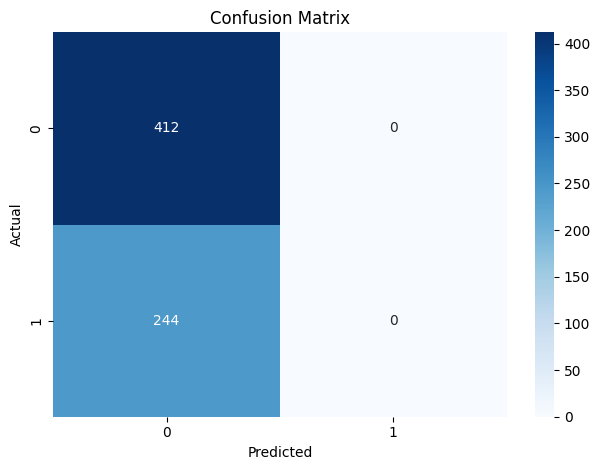

In [381]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


2. DECISION TREE CLASSIFIER

In [382]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [383]:
dt= DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
dt.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Feature Importance

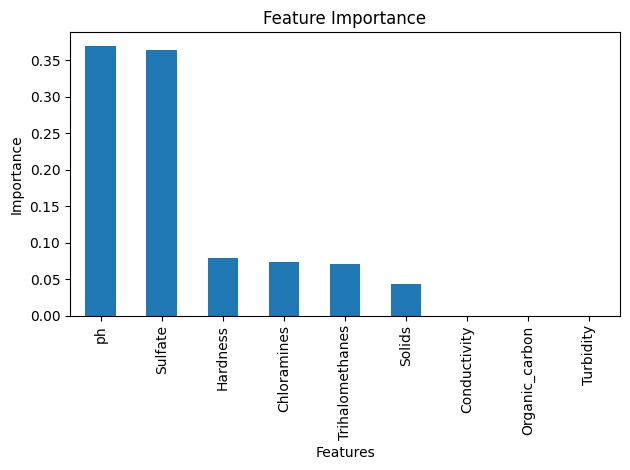

In [384]:
# feature importance
pd.Series(dt.feature_importances_, index=x.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

 Feature Selection

In [385]:
#Dropping the columns "Conductivity","Organic_carbon","Turbidity"

df.drop(columns=["Conductivity","Organic_carbon","Turbidity"])

,ph,Hardness,Solids,Chloramines,Sulfate,Trihalomethanes,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,86.990970,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,56.329076,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,66.420093,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,100.341674,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,31.997993,0
...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,66.687695,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,66.396293,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,69.845400,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,77.488213,1


In [386]:
y_pred= dt.predict(x_test)

In [387]:
# performance metrics
accuracy_dt = accuracy_score(y_test,y_pred)*100
print(f"Accuracy:{accuracy_score(y_test, y_pred)*100} %")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:63.262195121951216 %
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74       412
           1       0.51      0.31      0.38       244

    accuracy                           0.63       656
   macro avg       0.59      0.57      0.56       656
weighted avg       0.61      0.63      0.61       656

Confusion Matrix:
 [[340  72]
 [169  75]]


In [388]:
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 0.651
Accuracy on test set: 0.633


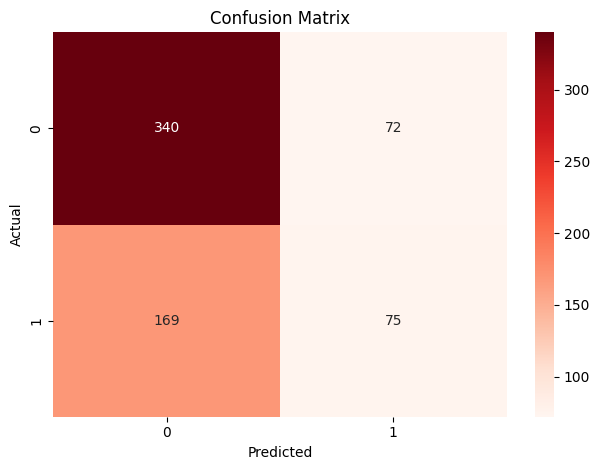

In [389]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

3. RANDOM FOREST

In [390]:
from sklearn.ensemble import RandomForestClassifier

In [391]:
rf = RandomForestClassifier(n_estimators=100,random_state=42, max_depth =4)
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Feature Importance

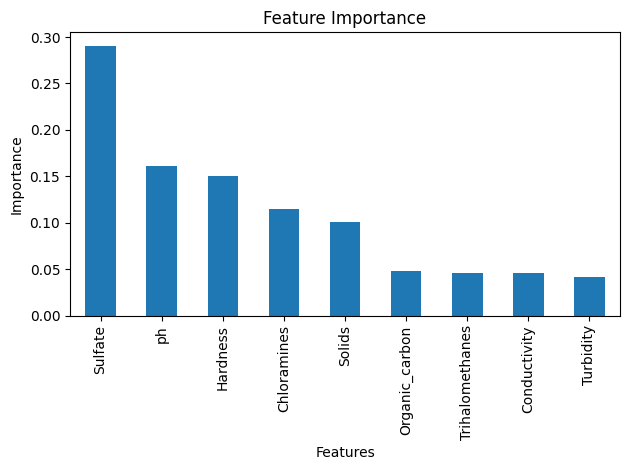

In [392]:
# feature importance
pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Every Feature has some particular importance so not removing any feature

In [393]:
y_pred= rf.predict(x_test)

In [394]:
#performace metrics
accuracy_rf = accuracy_score(y_test,y_pred)*100
print(f"Accuracy:{accuracy_score(y_test, y_pred)*100} %")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:65.70121951219512 %
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.98      0.78       412
           1       0.79      0.11      0.19       244

    accuracy                           0.66       656
   macro avg       0.72      0.54      0.49       656
weighted avg       0.70      0.66      0.56       656

Confusion Matrix:
 [[405   7]
 [218  26]]


In [395]:
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 0.656
Accuracy on test set: 0.657


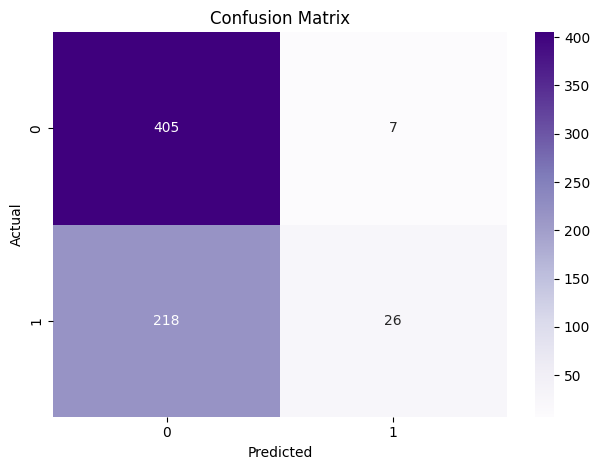

In [396]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Purples")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

4. KNN

In [397]:
from sklearn.neighbors import KNeighborsClassifier

In [398]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [399]:
y_pred = knn.predict(x_test)

In [400]:
#performace metrics
accuracy_knn= accuracy_score(y_test,y_pred)*100
print(f"Accuracy score :{accuracy_score(y_test,y_pred)*100} %")
print("confusion matrix :\n", confusion_matrix(y_test,y_pred))
print(" classification report:\n", classification_report(y_test,y_pred))

Accuracy score :54.57317073170732 %
confusion matrix :
 [[294 118]
 [180  64]]
 classification report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       412
           1       0.35      0.26      0.30       244

    accuracy                           0.55       656
   macro avg       0.49      0.49      0.48       656
weighted avg       0.52      0.55      0.53       656



In [401]:
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on training set: 0.685
Accuracy on test set: 0.546


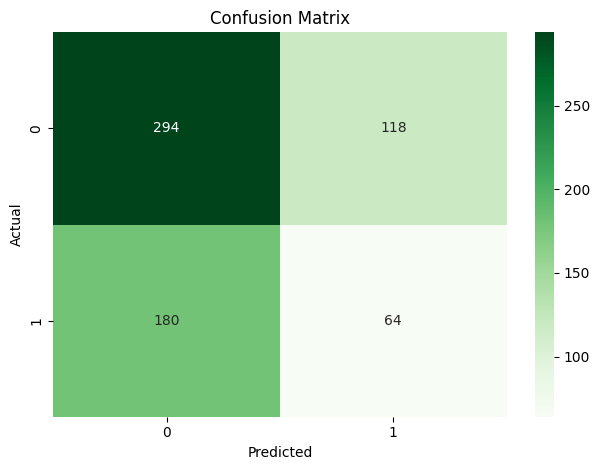

In [402]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

5. SUPPORT VECTOR MACHINE (SVM)

In [403]:
from sklearn.svm import SVC

In [404]:
svm = SVC(kernel='rbf', random_state = 42)
svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [405]:
y_pred= svm.predict(x_test)

In [406]:
#performace metrics
accuracy_svm= accuracy_score(y_test,y_pred)*100
print(f"Accuracy score :{accuracy_score(y_test,y_pred)*100} %")
print("confusion matrix :\n", confusion_matrix(y_test,y_pred))
print(" classification report:\n", classification_report(y_test,y_pred))

Accuracy score :62.80487804878049 %
confusion matrix :
 [[412   0]
 [244   0]]
 classification report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [407]:
print("Accuracy on training set: {:.3f}".format(svm.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(x_test, y_test)))

Accuracy on training set: 0.605
Accuracy on test set: 0.628


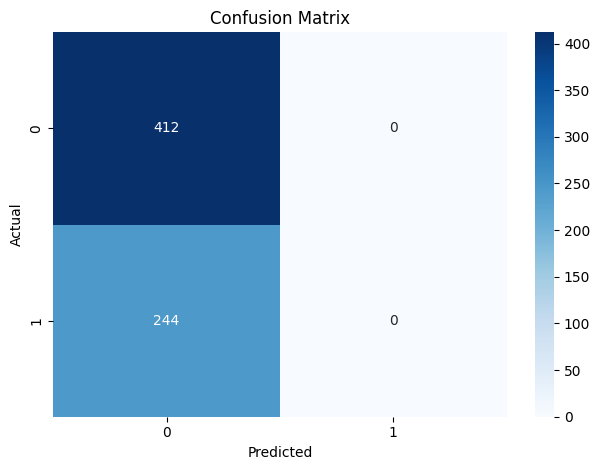

In [408]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

6. ADA BOOST

In [409]:
from sklearn.ensemble import AdaBoostClassifier

In [410]:
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(estimator=base_learner, n_estimators=50, random_state=42, learning_rate=1.0)
ada.fit(x_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


Feature Importance

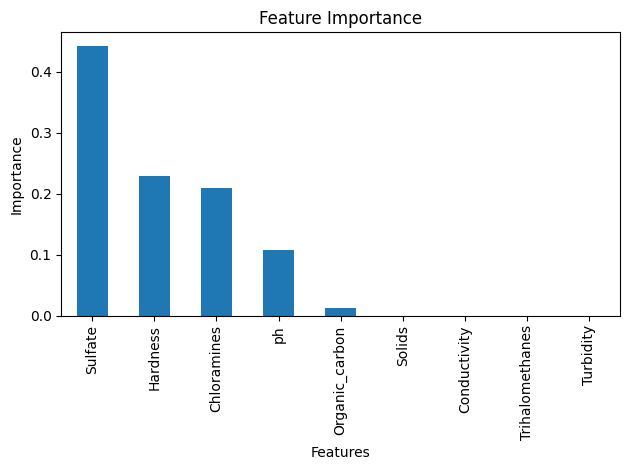

In [411]:
# feature importance
pd.Series(ada.feature_importances_, index=x.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Feature Selection

In [412]:
df.drop(columns=["Solids","Conductivity","Turbidity","Trihalomethanes"])

,ph,Hardness,Chloramines,Sulfate,Organic_carbon,Potability
0,7.080795,204.890455,7.300212,368.516441,10.379783,0
1,3.716080,129.422921,6.635246,333.775777,15.180013,0
2,8.099124,224.236259,9.275884,333.775777,16.868637,0
3,8.316766,214.373394,8.059332,356.886136,18.436524,0
4,9.092223,181.101509,6.546600,310.135738,11.558279,0
...,...,...,...,...,...,...
3271,4.668102,193.681735,7.166639,359.948574,13.894419,1
3272,7.808856,193.553212,8.061362,333.775777,19.903225,1
3273,9.419510,175.762646,7.350233,333.775777,11.039070,1
3274,5.126763,230.603758,6.303357,333.775777,11.168946,1


In [413]:
y_pred= ada.predict(x_test)

In [414]:
#performace metrics
accuracy_ada= accuracy_score(y_test,y_pred)*100
print(f"Accuracy score :{accuracy_score(y_test,y_pred)*100} %")
print("confusion matrix :\n", confusion_matrix(y_test,y_pred))
print(" classification report:\n", classification_report(y_test,y_pred))

Accuracy score :63.87195121951219 %
confusion matrix :
 [[407   5]
 [232  12]]
 classification report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.77       412
           1       0.71      0.05      0.09       244

    accuracy                           0.64       656
   macro avg       0.67      0.52      0.43       656
weighted avg       0.66      0.64      0.52       656



In [415]:
print("Accuracy on training set: {:.3f}".format(ada.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada.score(x_test, y_test)))

Accuracy on training set: 0.619
Accuracy on test set: 0.639


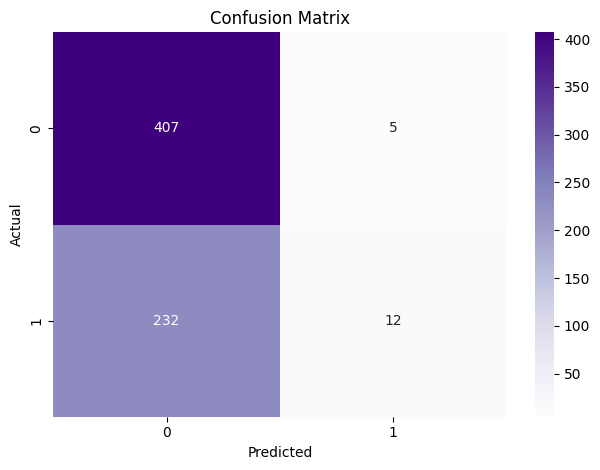

In [416]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Purples")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

6. XG BOOST

In [417]:
from xgboost import XGBClassifier

In [418]:
xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Feature Importance

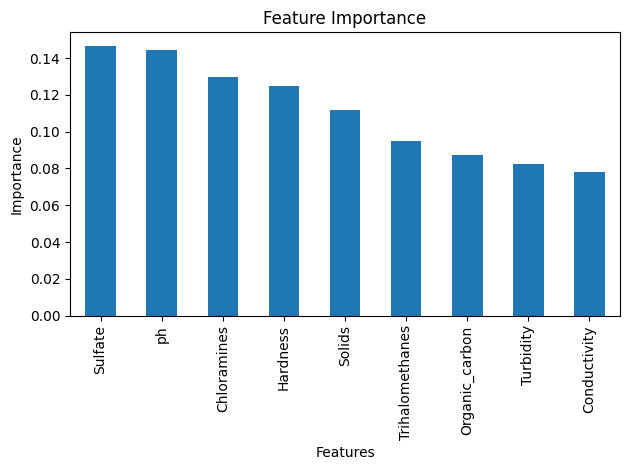

In [419]:
# feature importance
pd.Series(xgb.feature_importances_, index=x.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Every Feature has certain importance. So, not removing any feature.

In [420]:
y_pred= xgb.predict(x_test)

In [421]:
#performace metrics
accuracy_xgb= accuracy_score(y_test,y_pred)*100
print(f"Accuracy score :{accuracy_score(y_test,y_pred)*100} %")
print("confusion matrix :\n", confusion_matrix(y_test,y_pred))
print(" classification report:\n", classification_report(y_test,y_pred))

Accuracy score :68.14024390243902 %
confusion matrix :
 [[366  46]
 [163  81]]
 classification report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.64      0.33      0.44       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656



In [422]:
print("Accuracy on training set: {:.3f}".format(xgb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb.score(x_test, y_test)))

Accuracy on training set: 0.855
Accuracy on test set: 0.681


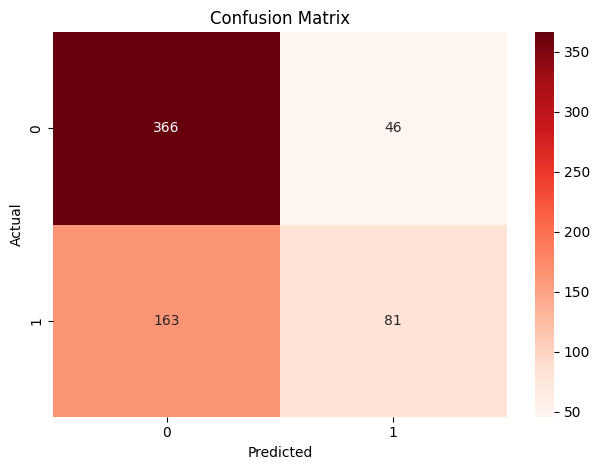

In [423]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

C:\Users\Singh\AppData\Local\Temp\ipykernel_1320\94626966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy_score', y='Model', data=models, palette="Set1")


,Model,Accuracy_score
6,XGBoost,68.140244
2,Random Forest,65.701220
5,ADABoost,63.871951
1,Decision Tree,63.262195
0,Logistic Regression,62.804878
4,SVM,62.804878
3,KNN,54.573171


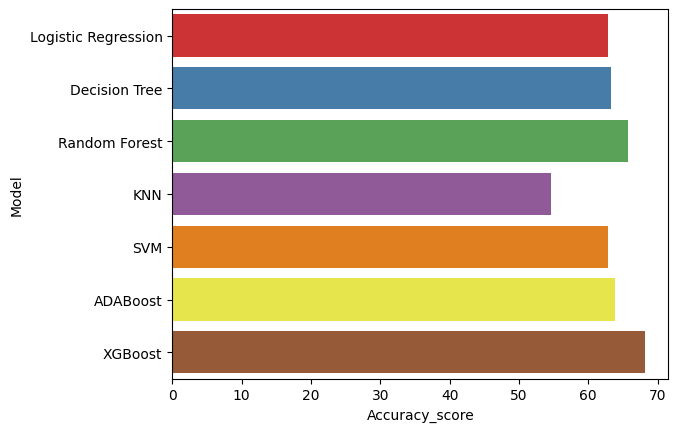

In [424]:
models = pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree', 'Random Forest' ,'KNN','SVM','ADABoost','XGBoost'],
    'Accuracy_score' :[accuracy_lg, accuracy_dt,accuracy_rf, accuracy_knn,accuracy_svm,accuracy_ada,accuracy_xgb]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models, palette="Set1")

models.sort_values(by='Accuracy_score', ascending=False)